# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_excel('/Users/skim1029/Downloads/normtemp.xlsx')




1. Distribution is normal
2. Yes and yes
3a. The bootstrap test gave a p-value of 0.5 which is way over 0.05. As such, there is weak evidence against the null hypothesis.
3b. Since sample is larger that 30, a z-test is appropriate.
3c. Both Z-test and t-test had p-values less than 0.05, which means that the null hypothesis can be rejected.
4. T-test since we have less sample.
5. Below 96.7 and above 99.4 is abnormal.
6a. Since we're testing to see if there a significant difference between the two sets, t-test is appropriate. 
6b. The p-value means that there is a statistically significant difference between male and female body temperatures. The null hypothesis is rejected.




In [28]:
df


,Temperature,Gender,Heart Rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73
5,97.1,1,75
6,97.1,1,82
7,97.2,1,64
8,97.3,1,69
9,97.4,1,70


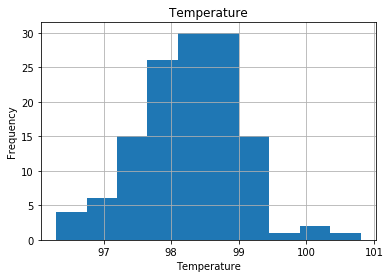

In [5]:
# the histogram of the data
import matplotlib.pyplot as plt

df.hist(column='Temperature', bins=10)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()





In [7]:
#normaltest
from scipy import stats

stats.normaltest(df.Temperature)

NormaltestResult(statistic=2.703801433319236, pvalue=0.2587479863488212)

In [9]:
#Bootstrap Hypothesis Test
#The null hypothesis states that the bootstrap sample mean of temperature will equal 98.6
import numpy as np

np.mean(df['Temperature'])
bs_sample = np.random.choice(df['Temperature'], size = 130)
np.mean(bs_sample)



98.17615384615385

In [10]:
p_value = np.sum(bs_sample >= df['Temperature'])/len(bs_sample)
p_value

0.5153846153846153

In [11]:
#Z-test
from statsmodels.stats.weightstats import ztest
z = ztest(df['Temperature'],value=98.6)
z

(-5.454823292364077, 4.902157014113424e-08)

In [13]:
#T-test
t = stats.ttest_1samp(df['Temperature'],98.6)
t


Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

In [16]:
sample_10 = np.random.choice(df['Temperature'], size = 10)
z_10 = ztest(sample_10,value=98.6)
t_10 = stats.ttest_1samp(sample_10,98.6)
t_10, z_10

(Ttest_1sampResult(statistic=-1.6070351454755722, pvalue=0.14250868496699473),
 (-1.6070351454755722, 0.1080466586195885))

In [17]:
#Question 5 - confidence test
conf_int = np.percentile(df['Temperature'], [2.5, 97.5])
conf_int

array([96.7225, 99.4775])

In [21]:
conf_int = np.percentile(bs_sample, [2.5, 97.5])
conf_int

array([96.745 , 99.4775])

In [25]:
#Question 5 - margin of error
margin_of_error = 1.96 * df['Temperature'].std()
sample_margin_of_error = 1.96 * bs_sample.std()
margin_of_error,sample_margin_of_error

(1.4370389897563334, 1.39375451184559)

In [36]:
#Question 6
male = df[df.Gender == 1 ]
female = df[df.Gender == 2 ] 
t = stats.ttest_ind(male['Temperature'],female['Temperature'])
t

Ttest_indResult(statistic=-2.2854345381654984, pvalue=0.02393188312240236)